# Analyse cleaned data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import langid

import nbimporter
from preprocessed_data_reader import ReaderPreprocessedData
from constants import Constants

Importing Jupyter notebook from preprocessed_data_reader.ipynb
Importing Jupyter notebook from utils_os.ipynb
Importing Jupyter notebook from constants.ipynb


In [2]:
dataset = ReaderPreprocessedData.read_data(Constants.path_to_preprocessed)

In [3]:
len(dataset)

50

## Analyse number of words per article and read time

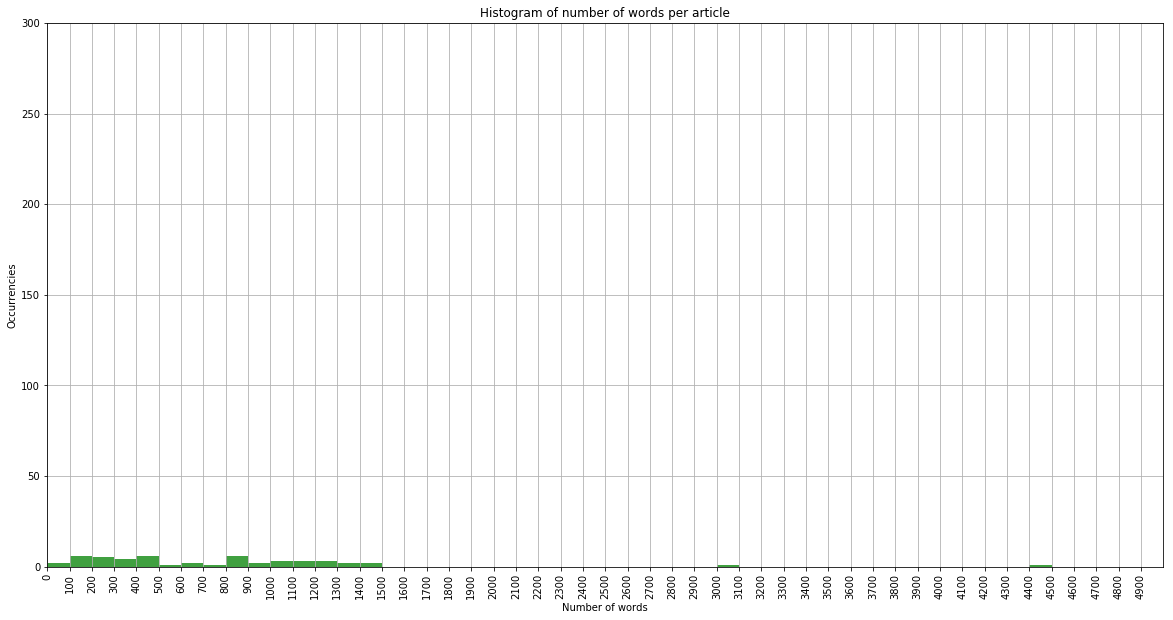

In [4]:
x = [len(el["content"].split(" ")) for el in dataset]

# the histogram of the data
plt.figure(figsize=(20,10))
max_x = 5000
max_y = 300
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, range=(0, max_x), facecolor='g', alpha=0.75)


plt.xlabel('Number of words')
plt.ylabel('Occurrencies')
plt.title('Histogram of number of words per article')
plt.axis([0, max_x, 0, max_y])
plt.xticks([max_x/num_bins*i for i in range(num_bins)], rotation=90)
plt.grid(True)
plt.show()

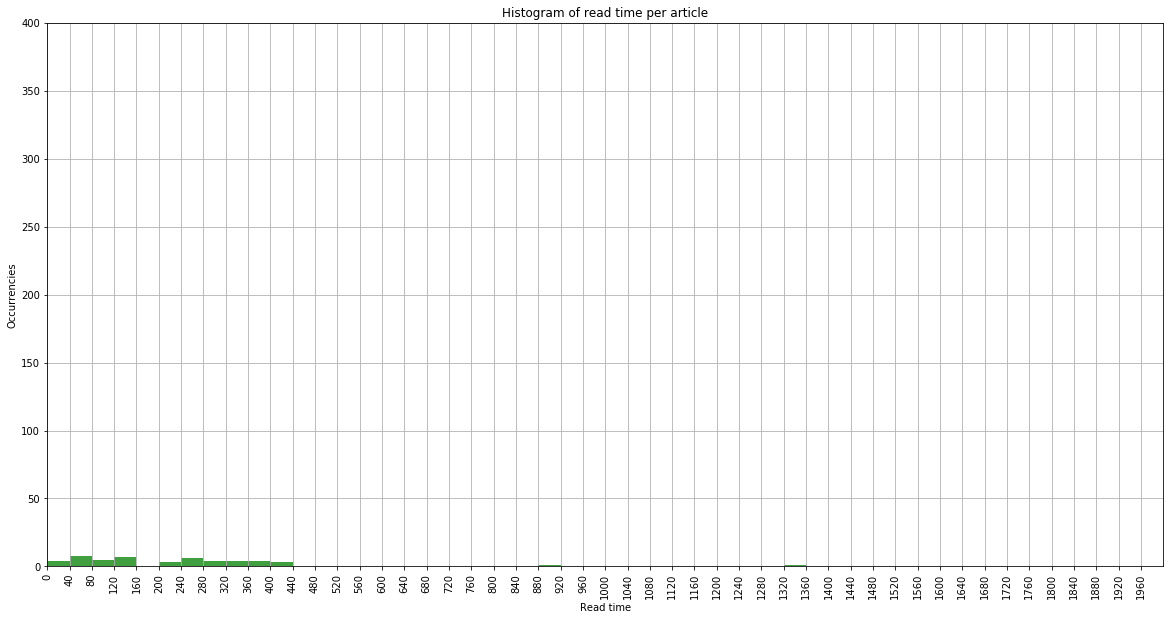

In [5]:
x = [el["read_time"] for el in dataset]

# the histogram of the data
plt.figure(figsize=(20,10))
max_x = 2000
max_y = 400
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, range=(0, max_x), facecolor='g', alpha=0.75)


plt.xlabel('Read time')
plt.ylabel('Occurrencies')
plt.title('Histogram of read time per article')
plt.axis([0, max_x, 0, max_y])
plt.xticks([max_x/num_bins*i for i in range(num_bins)], rotation=90)
plt.grid(True)
plt.show()

## See languages (still not working as expected...)

In [6]:
for d in dataset:
    d["lang"] = langid.classify(d["title"])[0]

(array([50.]), array([-0.5,  0.5]), <a list of 1 Patch objects>)

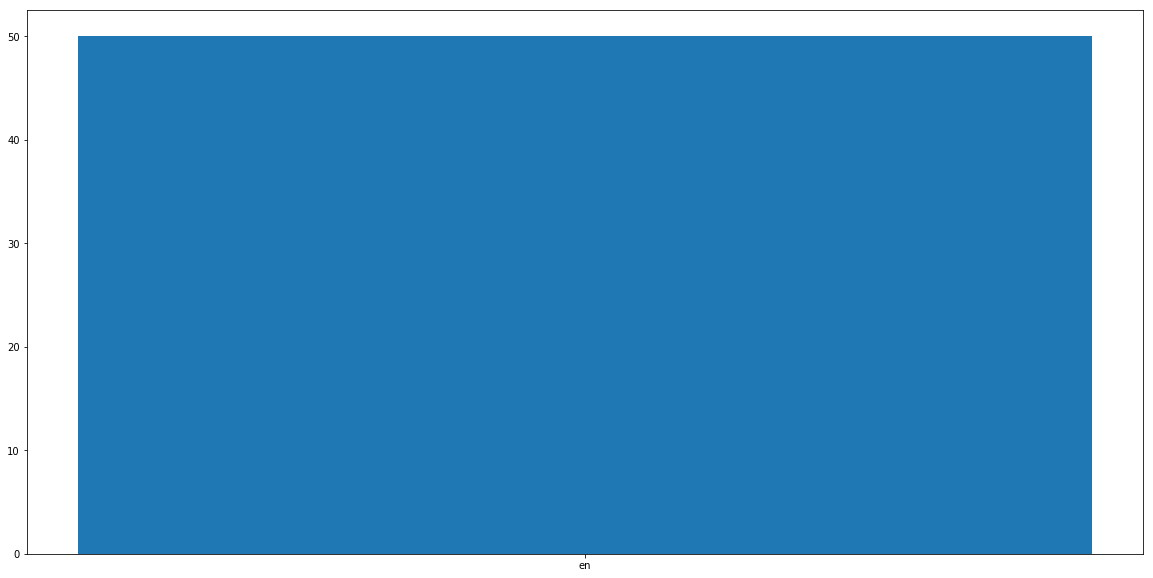

In [7]:
plt.figure(figsize=(20,10))
plt.hist([d["lang"] for d in dataset], len(set([d["lang"] for d in dataset])))

In [8]:
for d in dataset:
    if d["lang"] == "fr":
        print(d["title"])